## Import required libraries

In [12]:
# tidyverse includes dplyr, tidyr, readr, ggplot2
library(tidyverse)
library(gmodels)
library(ggmosaic)

## A few grapics settings

In [13]:
## default theme for ggplot
theme_set(theme_bw())

## setting default parameters for mosaic plots
mosaic_theme = theme(axis.text.x = element_text(angle = 90,
                                                hjust = 1,
                                                vjust = 0.5),
                     axis.text.y = element_blank(),
                     axis.ticks.y = element_blank())

## Load the data

In [14]:
data_dir <- "../data/bank-full.csv"
bank_data <- read.csv(data_dir)

## Textual exploration

In [15]:
sprintf("# rows: %d - # columns: %d", nrow(bank_data), ncol(bank_data))
head(bank_data,10)

[1] "# rows: 41188 - # columns: 21"

age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [16]:
summary(bank_data)

      age                 job            marital     
 Min.   :17.00   admin.     :10422   divorced: 4612  
 1st Qu.:32.00   blue-collar: 9254   married :24928  
 Median :38.00   technician : 6743   single  :11568  
 Mean   :40.02   services   : 3969   unknown :   80  
 3rd Qu.:47.00   management : 2924                   
 Max.   :98.00   retired    : 1720                   
                 (Other)    : 6156                   
               education        default         housing           loan      
 university.degree  :12168   no     :32588   no     :18622   no     :33950  
 high.school        : 9515   unknown: 8597   unknown:  990   unknown:  990  
 basic.9y           : 6045   yes    :    3   yes    :21576   yes    : 6248  
 professional.course: 5243                                                  
 basic.4y           : 4176                                                  
 basic.6y           : 2292                                                  
 (Other)            : 1749   

In [17]:
CrossTable(bank_data$y) # from gmodels


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  41188 

 
          |        no |       yes | 
          |-----------|-----------|
          |     36548 |      4640 | 
          |     0.887 |     0.113 | 
          |-----------|-----------|



 


In [18]:
bank_data %>% 
  summarise_all(list(~sum(. == "unknown"))) %>%
  gather(key = "variable", value = "nr_unknown") %>% 
  arrange(-nr_unknown)

variable,nr_unknown
<chr>,<int>
default,8597
education,1731
housing,990
loan,990
job,330
marital,80
age,0
contact,0
month,0


## Visualization

### A simple histogram of the `age` distribution

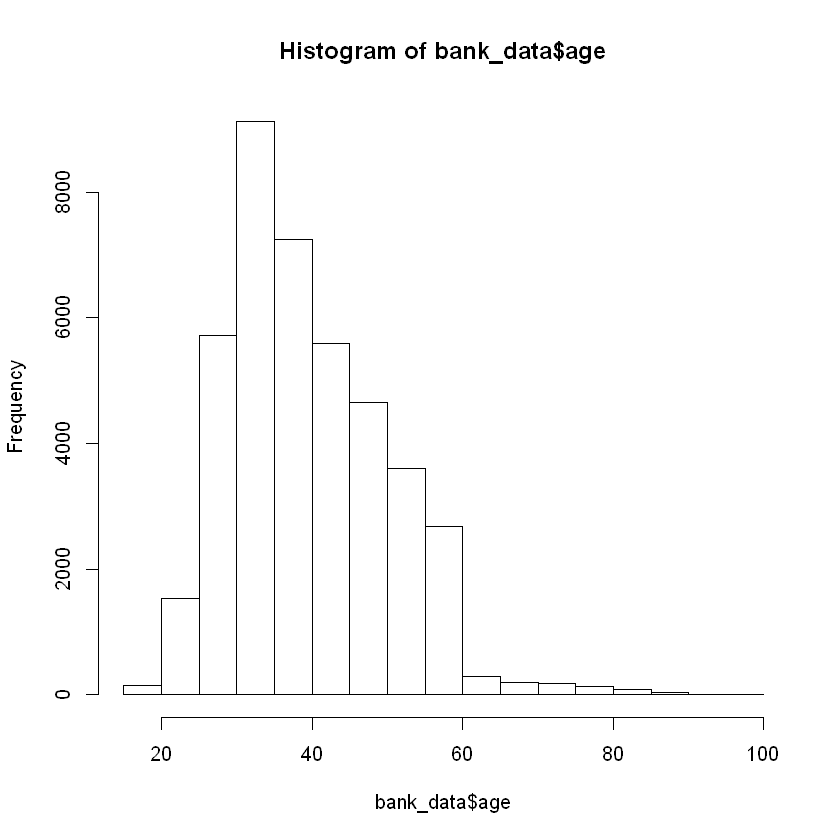

In [19]:
hist(bank_data$age)

### Distribution of `age` for the different classification groups (i.e. `y` column)

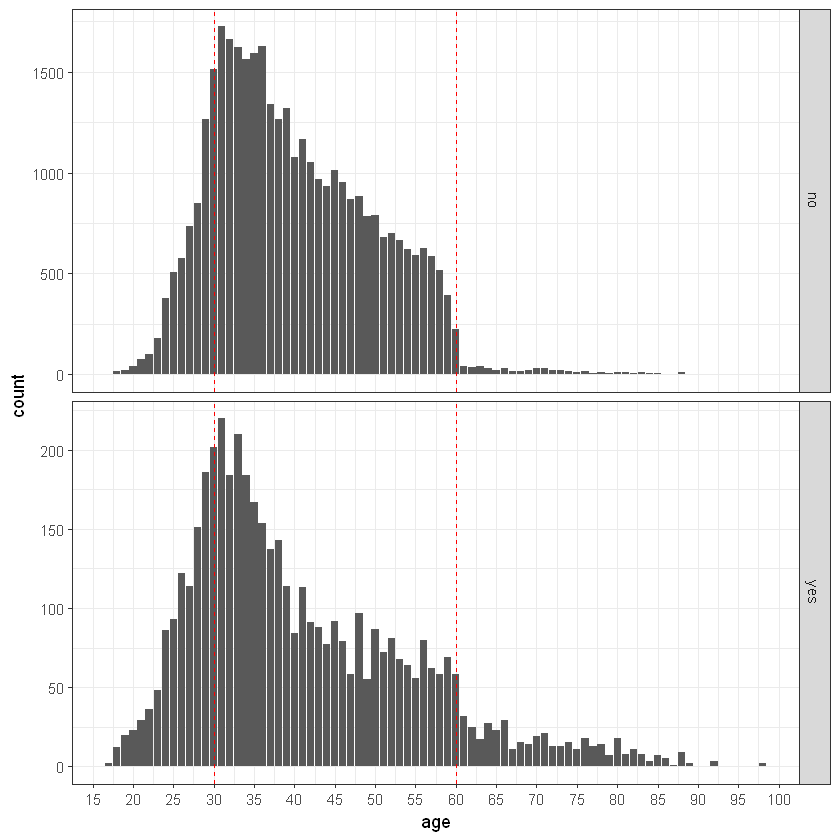

In [20]:
# show histograms for the 'age' feature for the different values of the 'y' column
bank_data %>% 
  ggplot() +
  aes(x = age) +
  geom_bar() +
  geom_vline(xintercept = c(30, 60), 
             col = "red",
             linetype = "dashed") +
  facet_grid(y ~ .,
             scales = "free_y") +
  scale_x_continuous(breaks = seq(0, 100, 5))

### Distribution of the categorial feature `job` for the different classification groups 

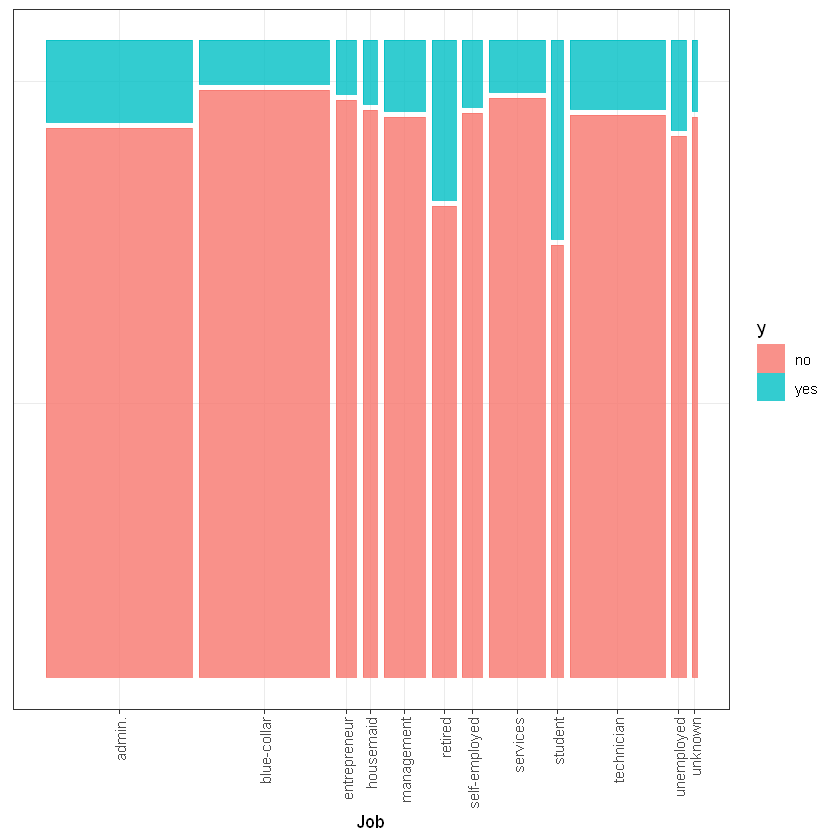

In [21]:
bank_data %>% 
  ggplot() +
  geom_mosaic(aes(x = product(y, job), fill = y)) +
  mosaic_theme +
  xlab("Job") +
  ylab(NULL)